* **Logistic Regression**

The management wants to build an Intelligent system from the data to determine the presence or absence of smoking in a person through bio-signals.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("smoking.csv")
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


#**Exploratory** Data Analysis

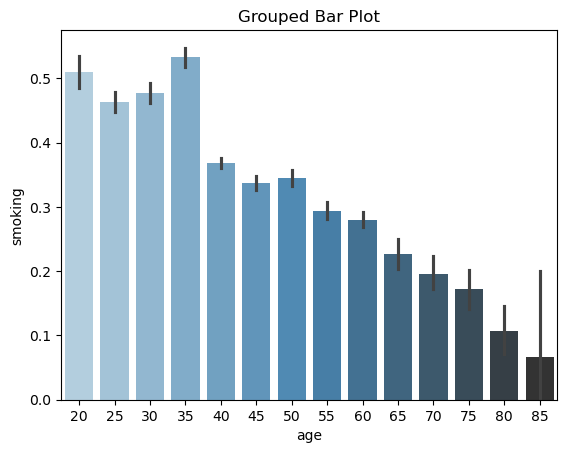

In [3]:
# Create a grouped bar plot
sns.barplot(x='age', y='smoking', hue= 'age', data=df, palette='Blues_d', legend=False)
plt.title('Grouped Bar Plot')
plt.show()

* **The graph shows that the younger people are more addicted to smoking unlike the older people**

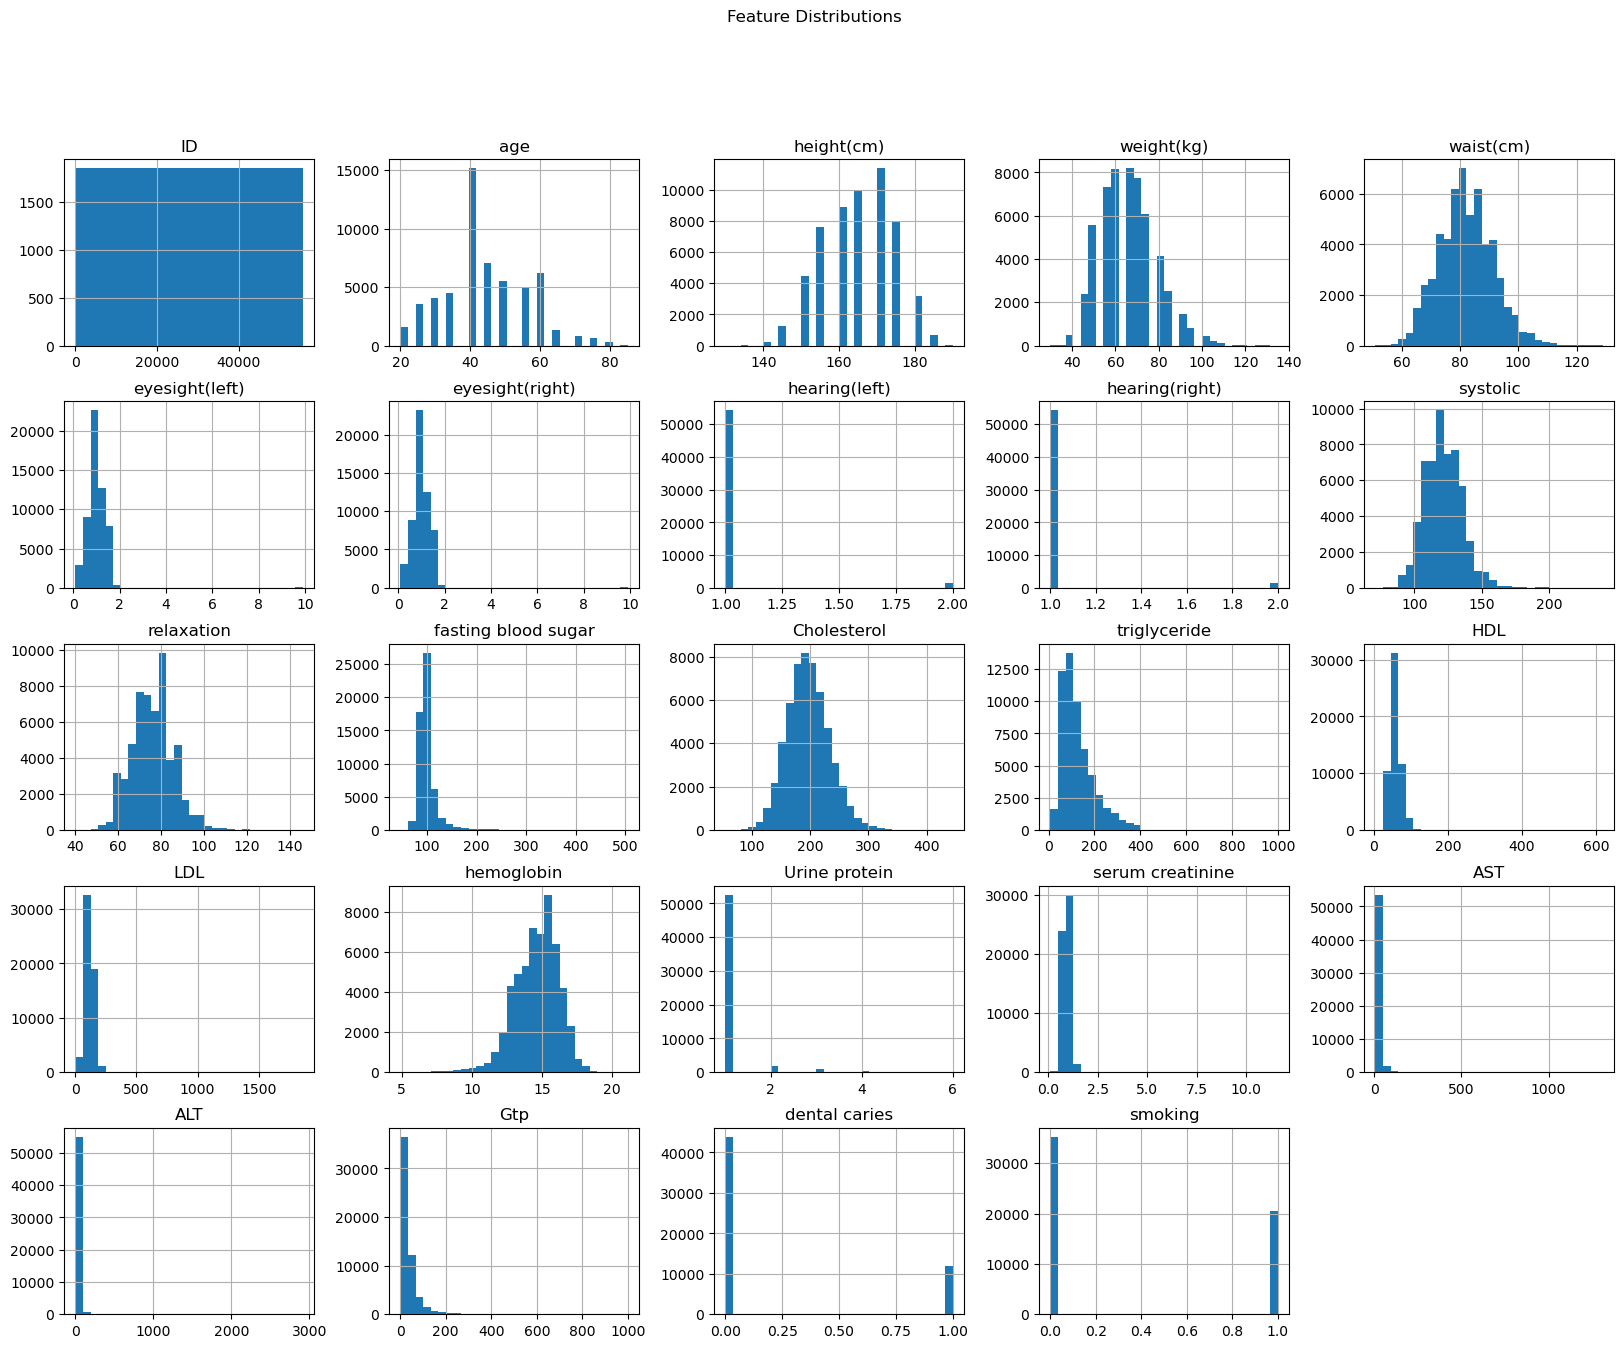

In [7]:
# Histograms for feature distributions
df.hist(bins=30, figsize=(20, 15))
plt.suptitle('Feature Distributions')
plt.show()

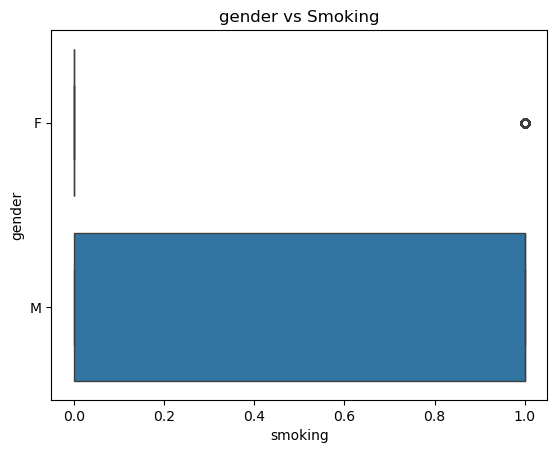

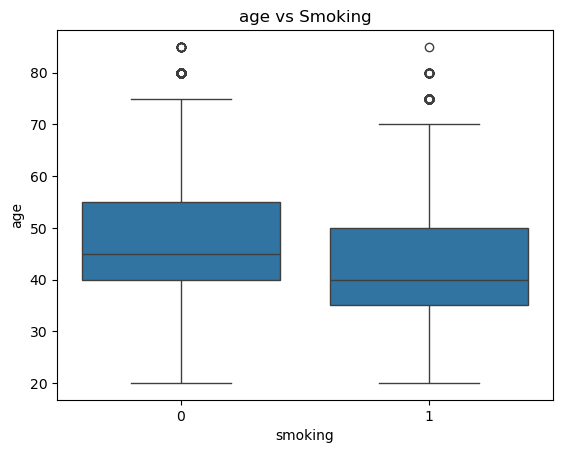

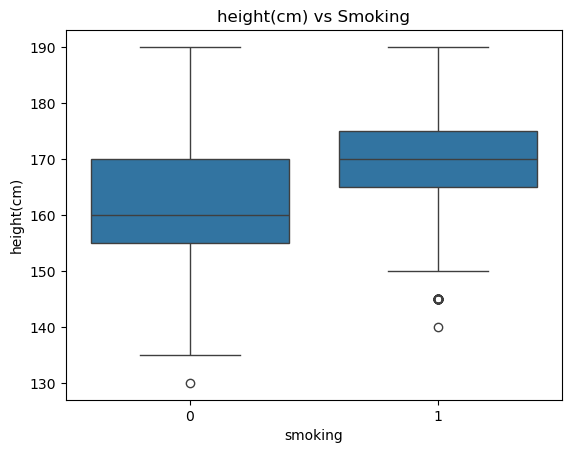

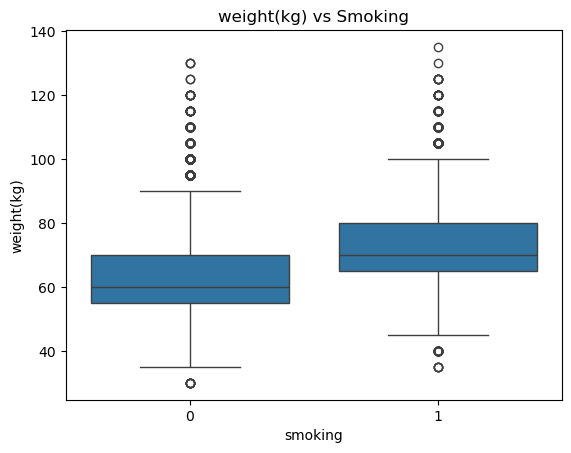

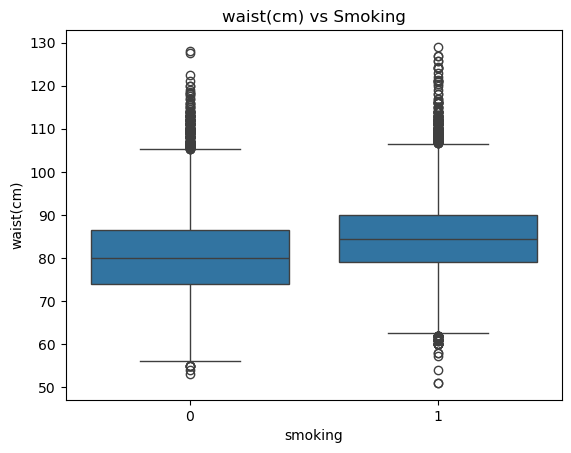

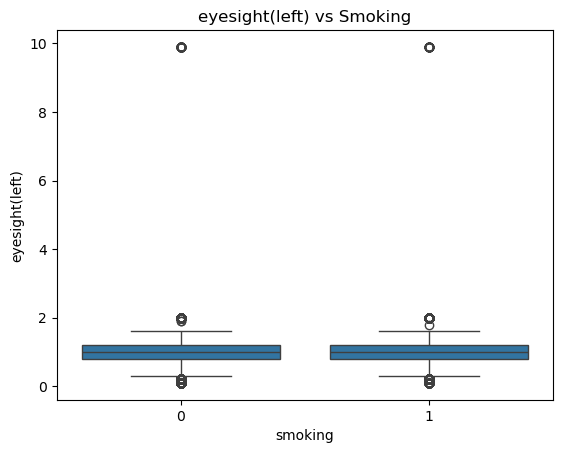

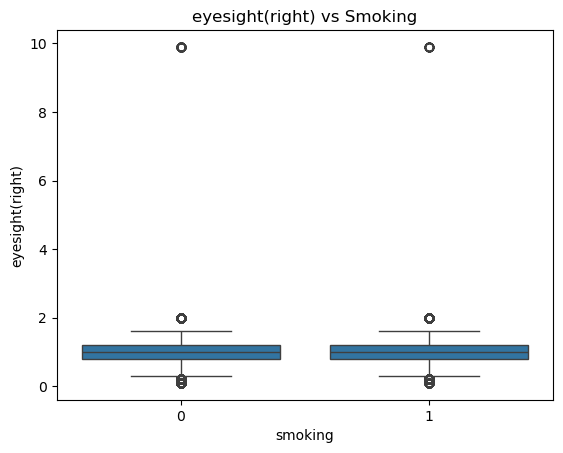

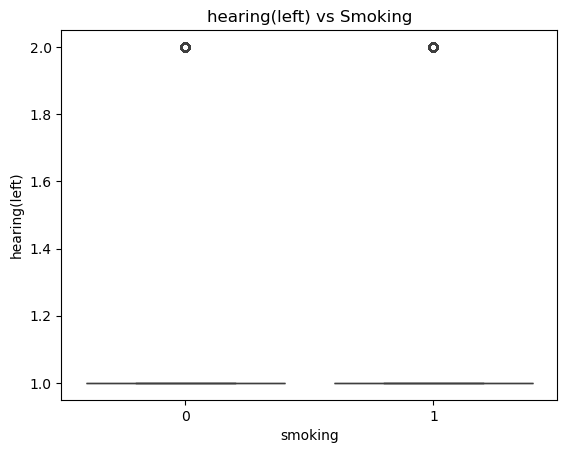

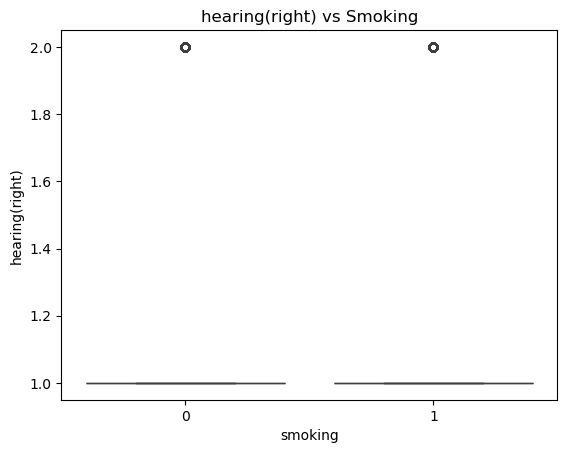

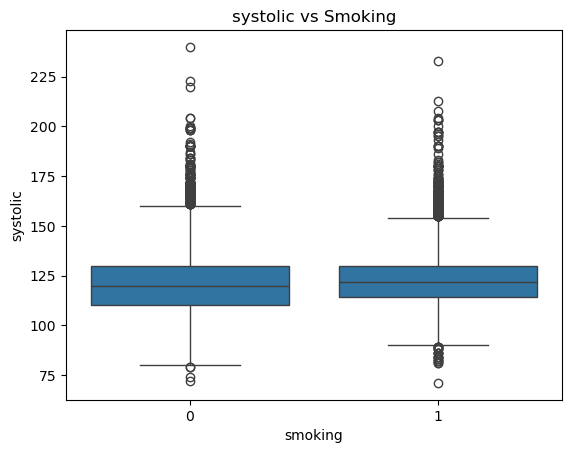

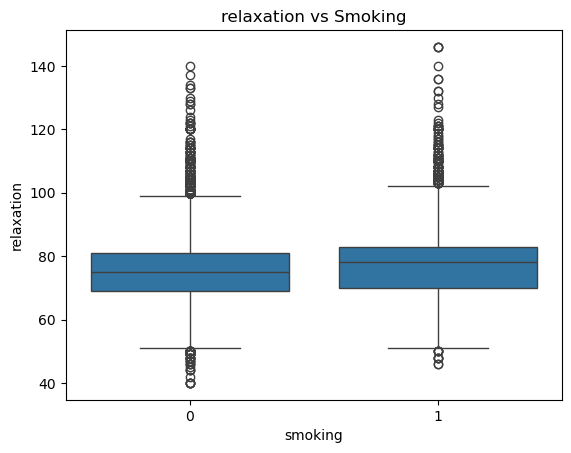

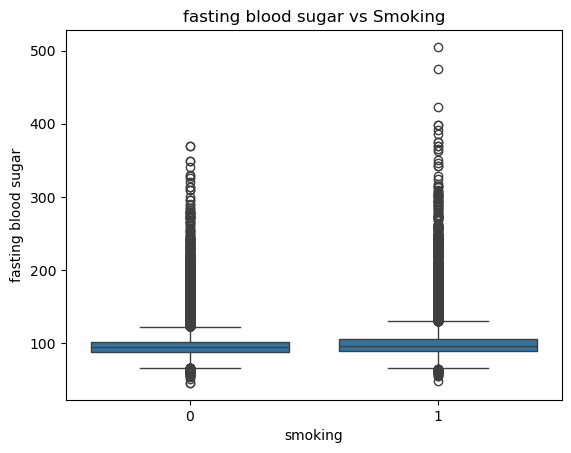

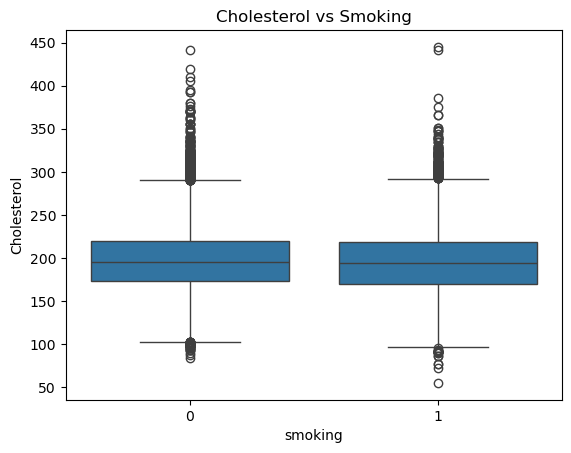

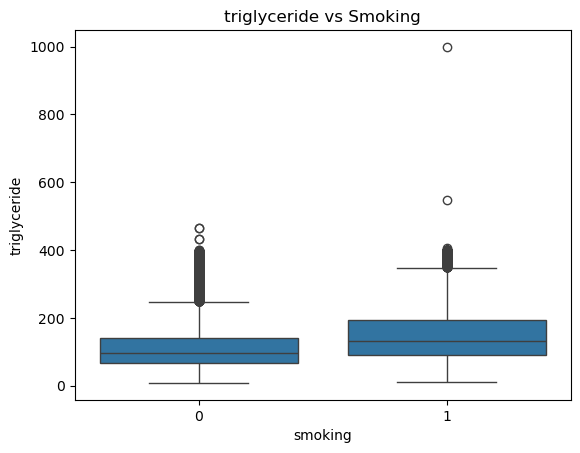

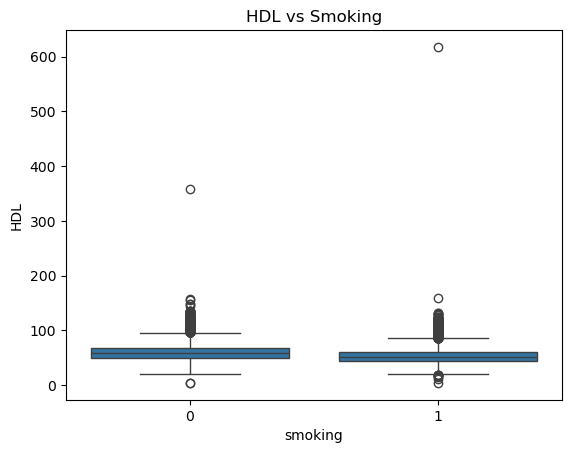

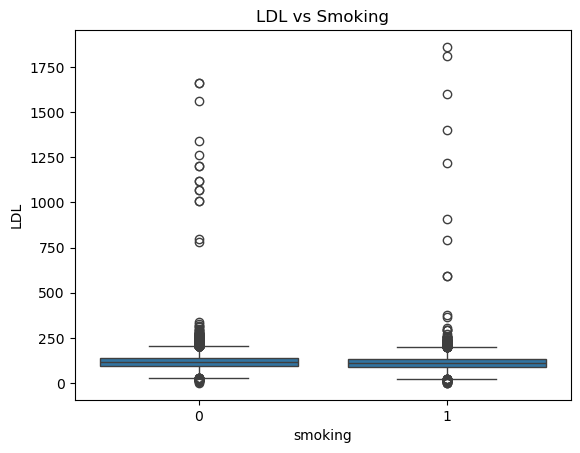

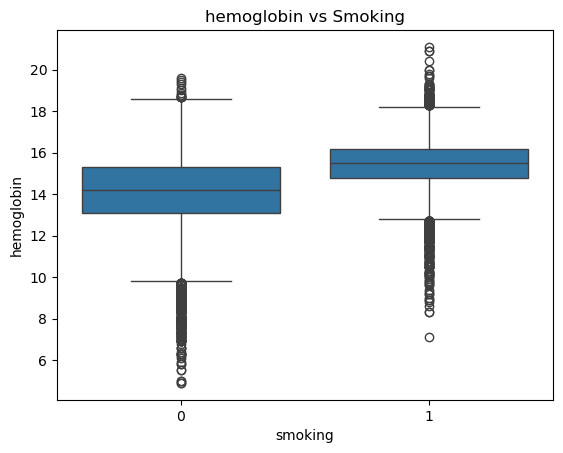

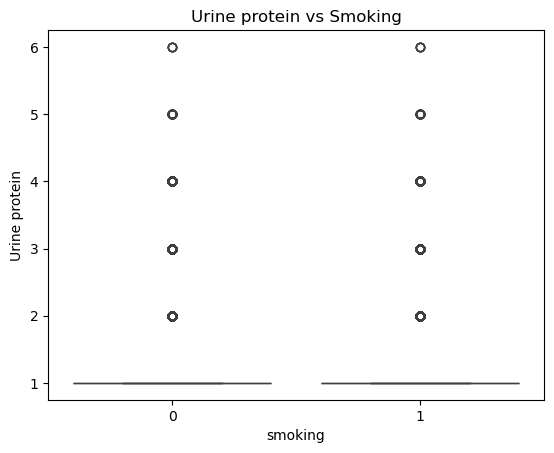

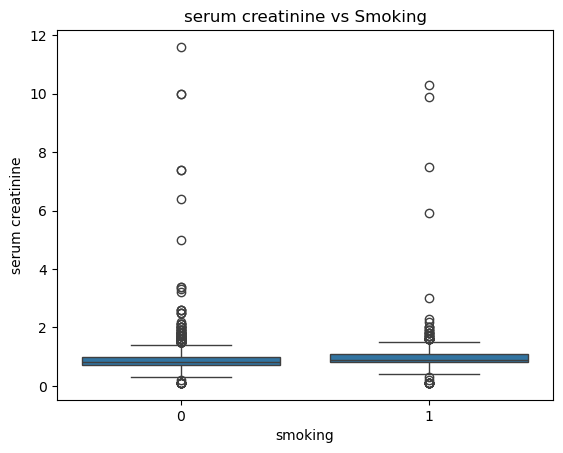

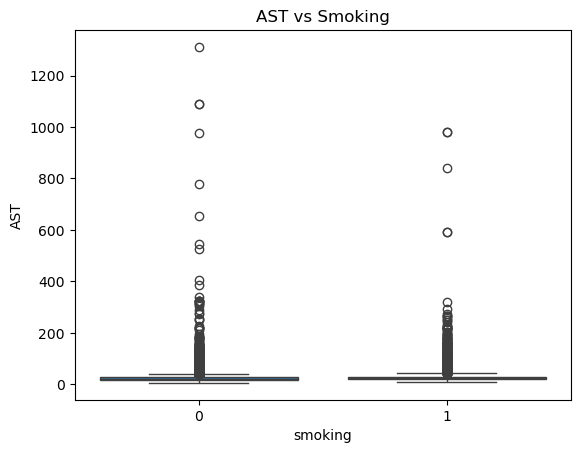

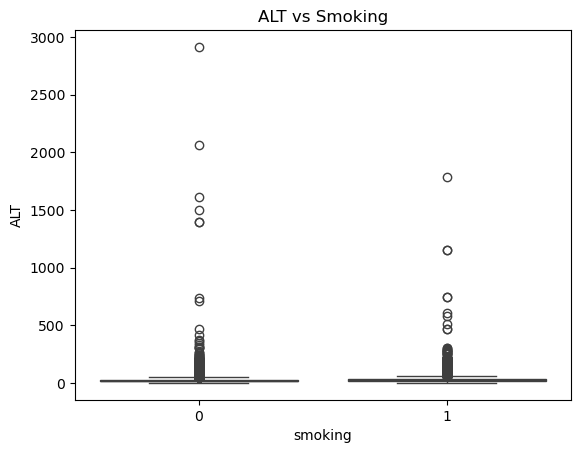

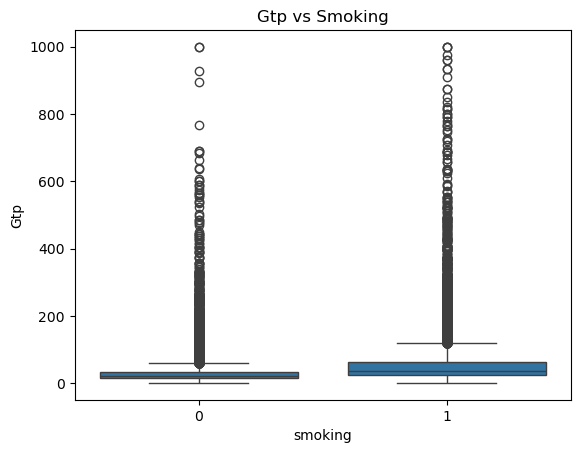

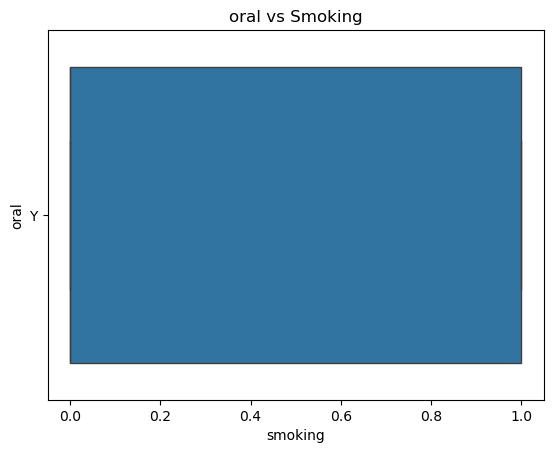

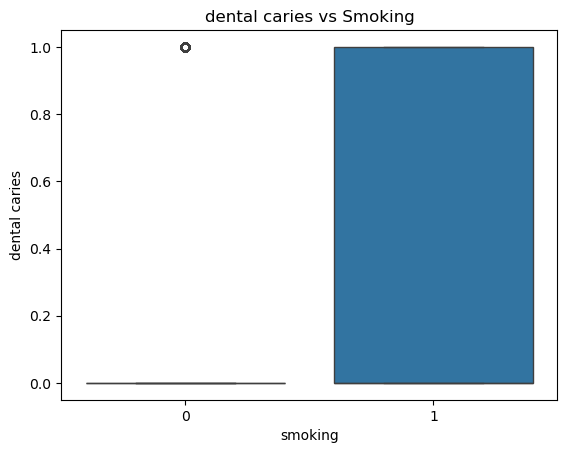

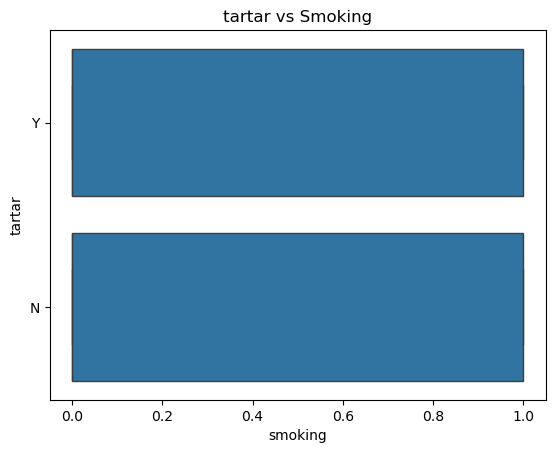

In [8]:
# Box plots of features against target
for column in df.columns:
    if column != 'smoking' and column != 'ID':
        sns.boxplot(x='smoking', y=column, data=df)
        plt.title(f'{column} vs Smoking')
        plt.show()

In [9]:
df.isna().sum()       #or df.isnull().sum()

ID                     0
gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
oral                   0
dental caries          0
tartar                 0
smoking                0
dtype: int64

In [10]:
# Removing Duplicates:

df.duplicated().sum()
# data has no redundancy as all the records are unique

0

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   55692 non-null  int64  
 1   gender               55692 non-null  object 
 2   age                  55692 non-null  int64  
 3   height(cm)           55692 non-null  int64  
 4   weight(kg)           55692 non-null  int64  
 5   waist(cm)            55692 non-null  float64
 6   eyesight(left)       55692 non-null  float64
 7   eyesight(right)      55692 non-null  float64
 8   hearing(left)        55692 non-null  float64
 9   hearing(right)       55692 non-null  float64
 10  systolic             55692 non-null  float64
 11  relaxation           55692 non-null  float64
 12  fasting blood sugar  55692 non-null  float64
 13  Cholesterol          55692 non-null  float64
 14  triglyceride         55692 non-null  float64
 15  HDL                  55692 non-null 

In [12]:
df["oral"].unique()

array(['Y'], dtype=object)

In [13]:
# Removing the Unnecessary Columns
df.drop(["ID","oral"],inplace=True,axis=1)      # since 'oral' colummn has only "Y" variable 
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [14]:
# Outliers Analysis
df.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'Cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar',
       'smoking'],
      dtype='object')

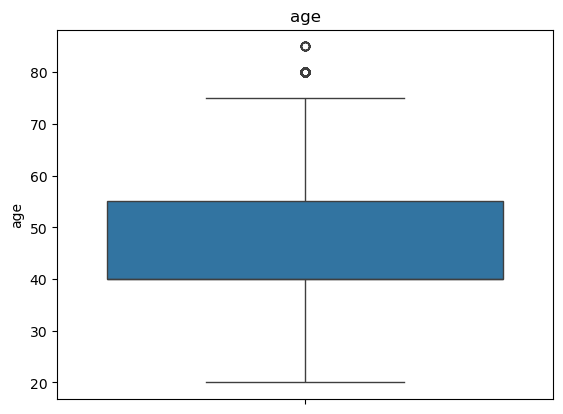

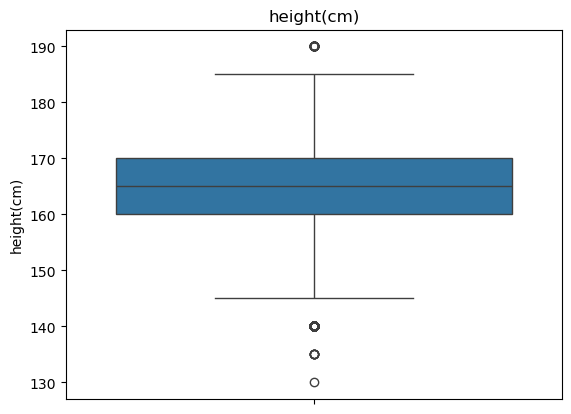

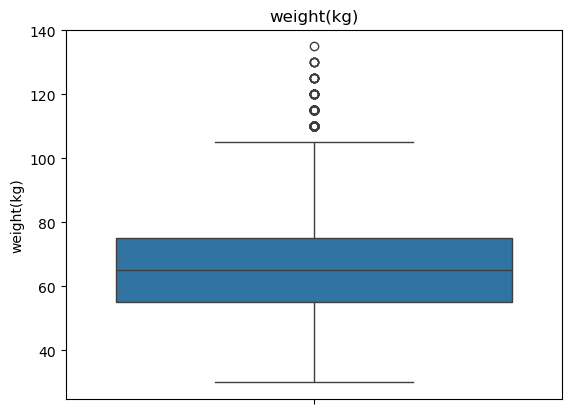

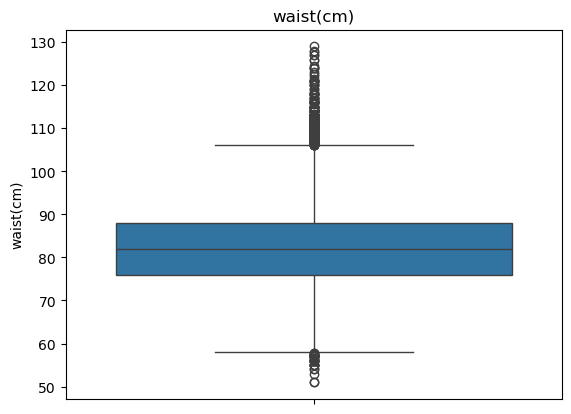

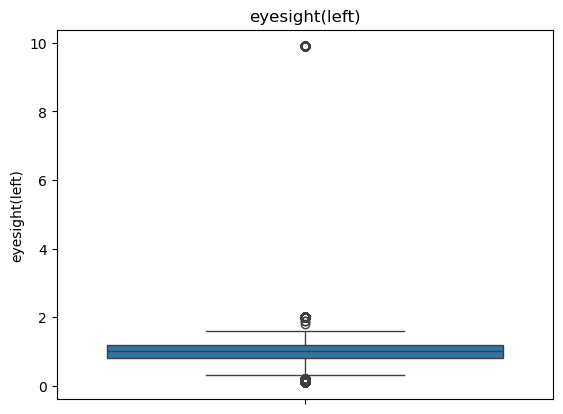

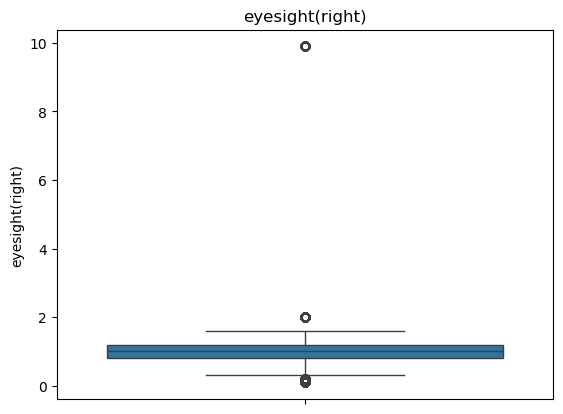

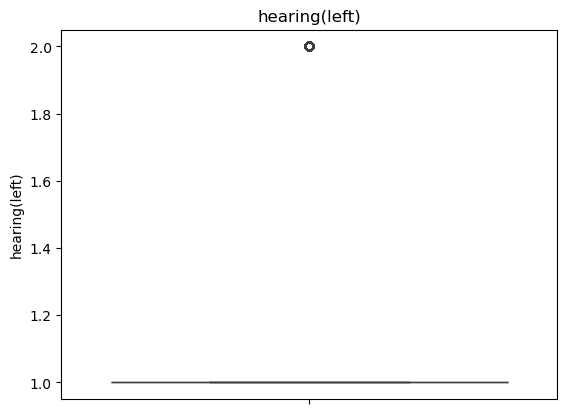

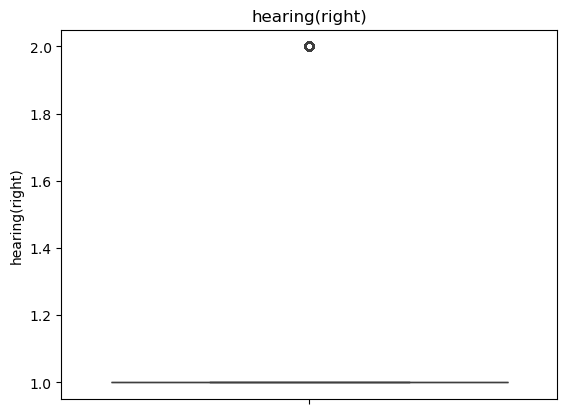

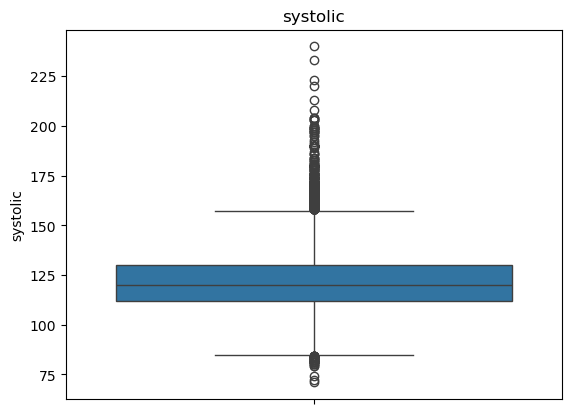

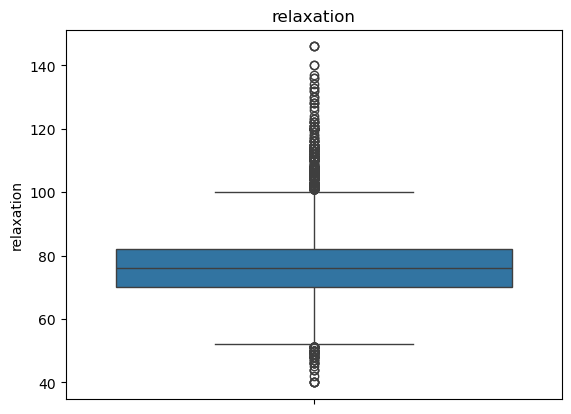

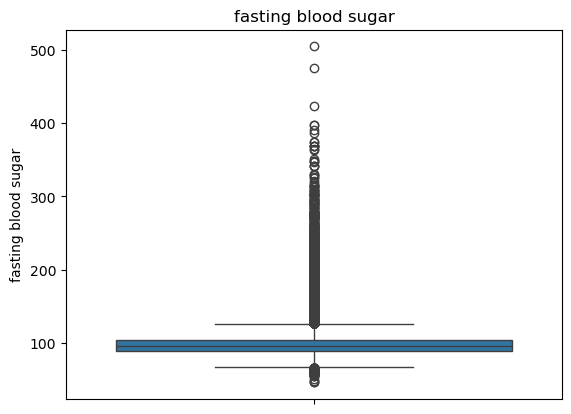

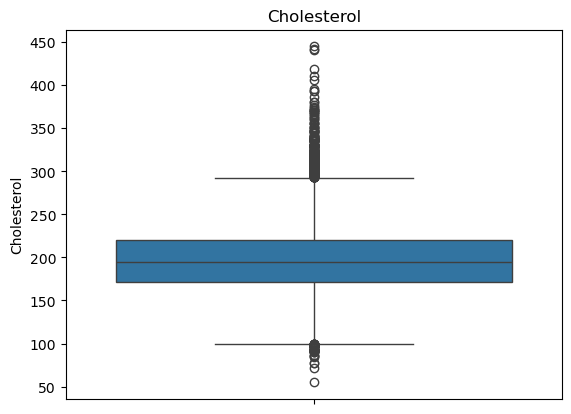

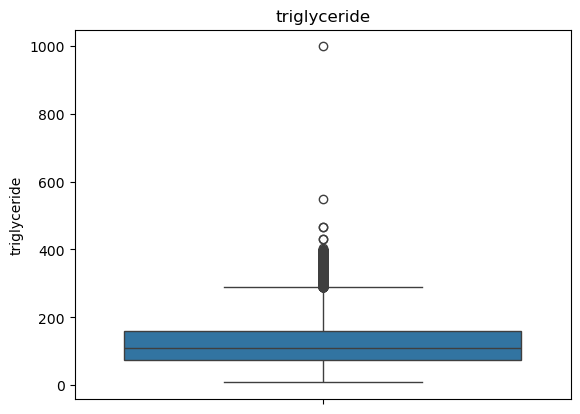

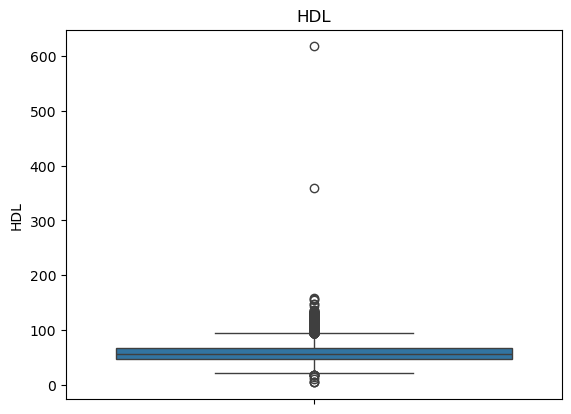

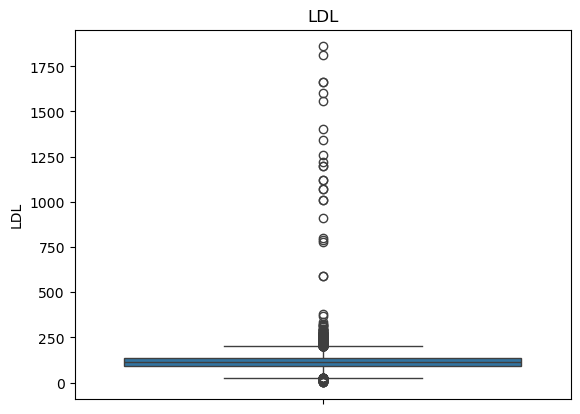

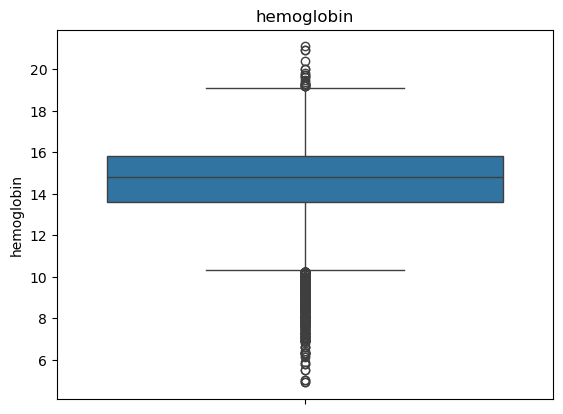

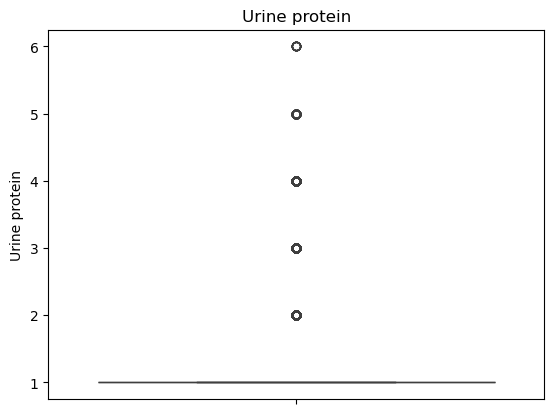

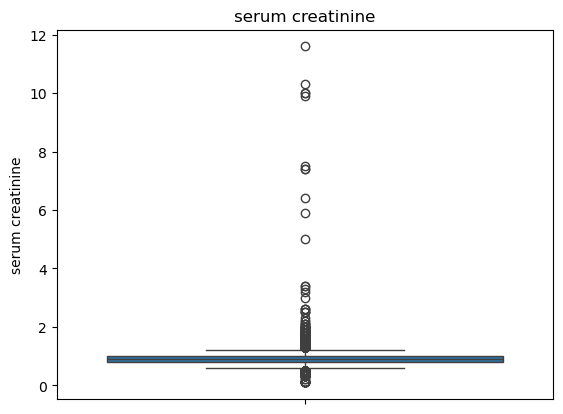

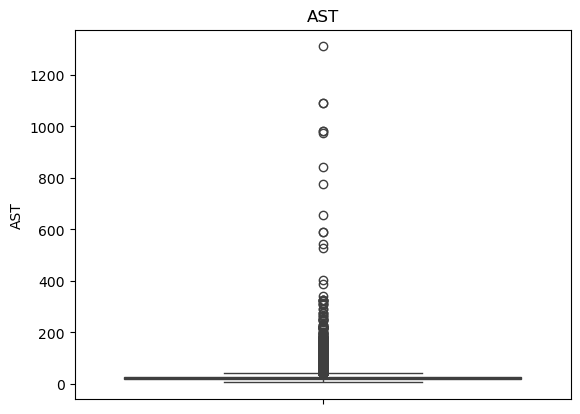

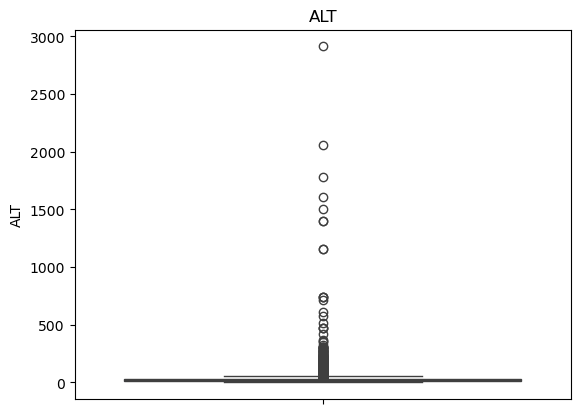

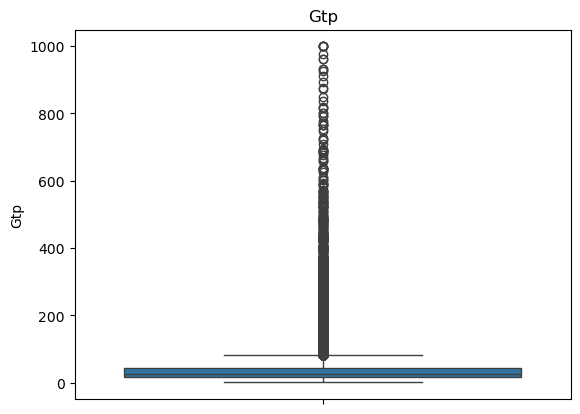

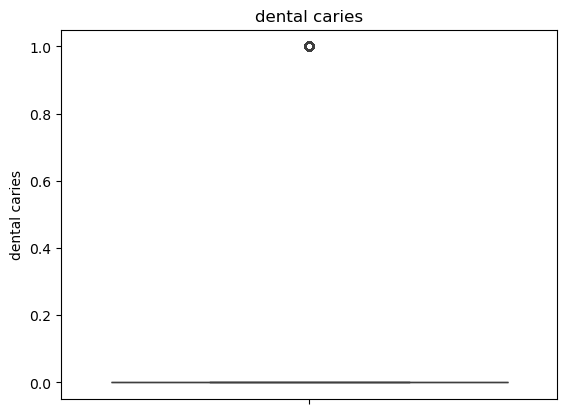

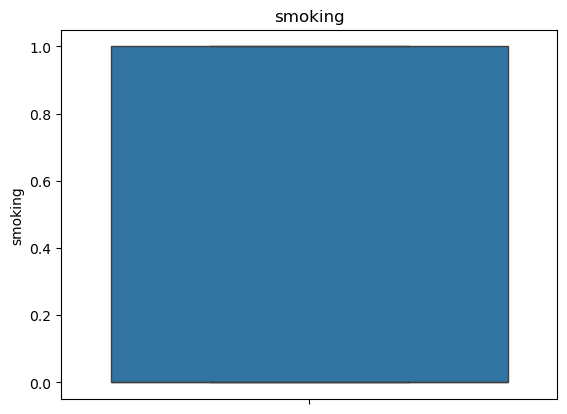

In [15]:
import seaborn as sns
# Checking for Outliers Using Boxplot

for col in df.columns:
    if df[col].dtype!="object":
        sns.boxplot(df[col])
        plt.title(col)
        plt.show()

* **There are too many outliers as if now , thus not removing and considering them as important**

In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
df["gender"]=le.fit_transform(df["gender"])
le.classes_

array(['F', 'M'], dtype=object)

In [18]:
df["tartar"]=le.fit_transform(df["tartar"])
le.classes_

array(['N', 'Y'], dtype=object)

In [19]:
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,0,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,1,0
1,0,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,1,0
2,1,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,0,1
3,1,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,1,0
4,0,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,0,0


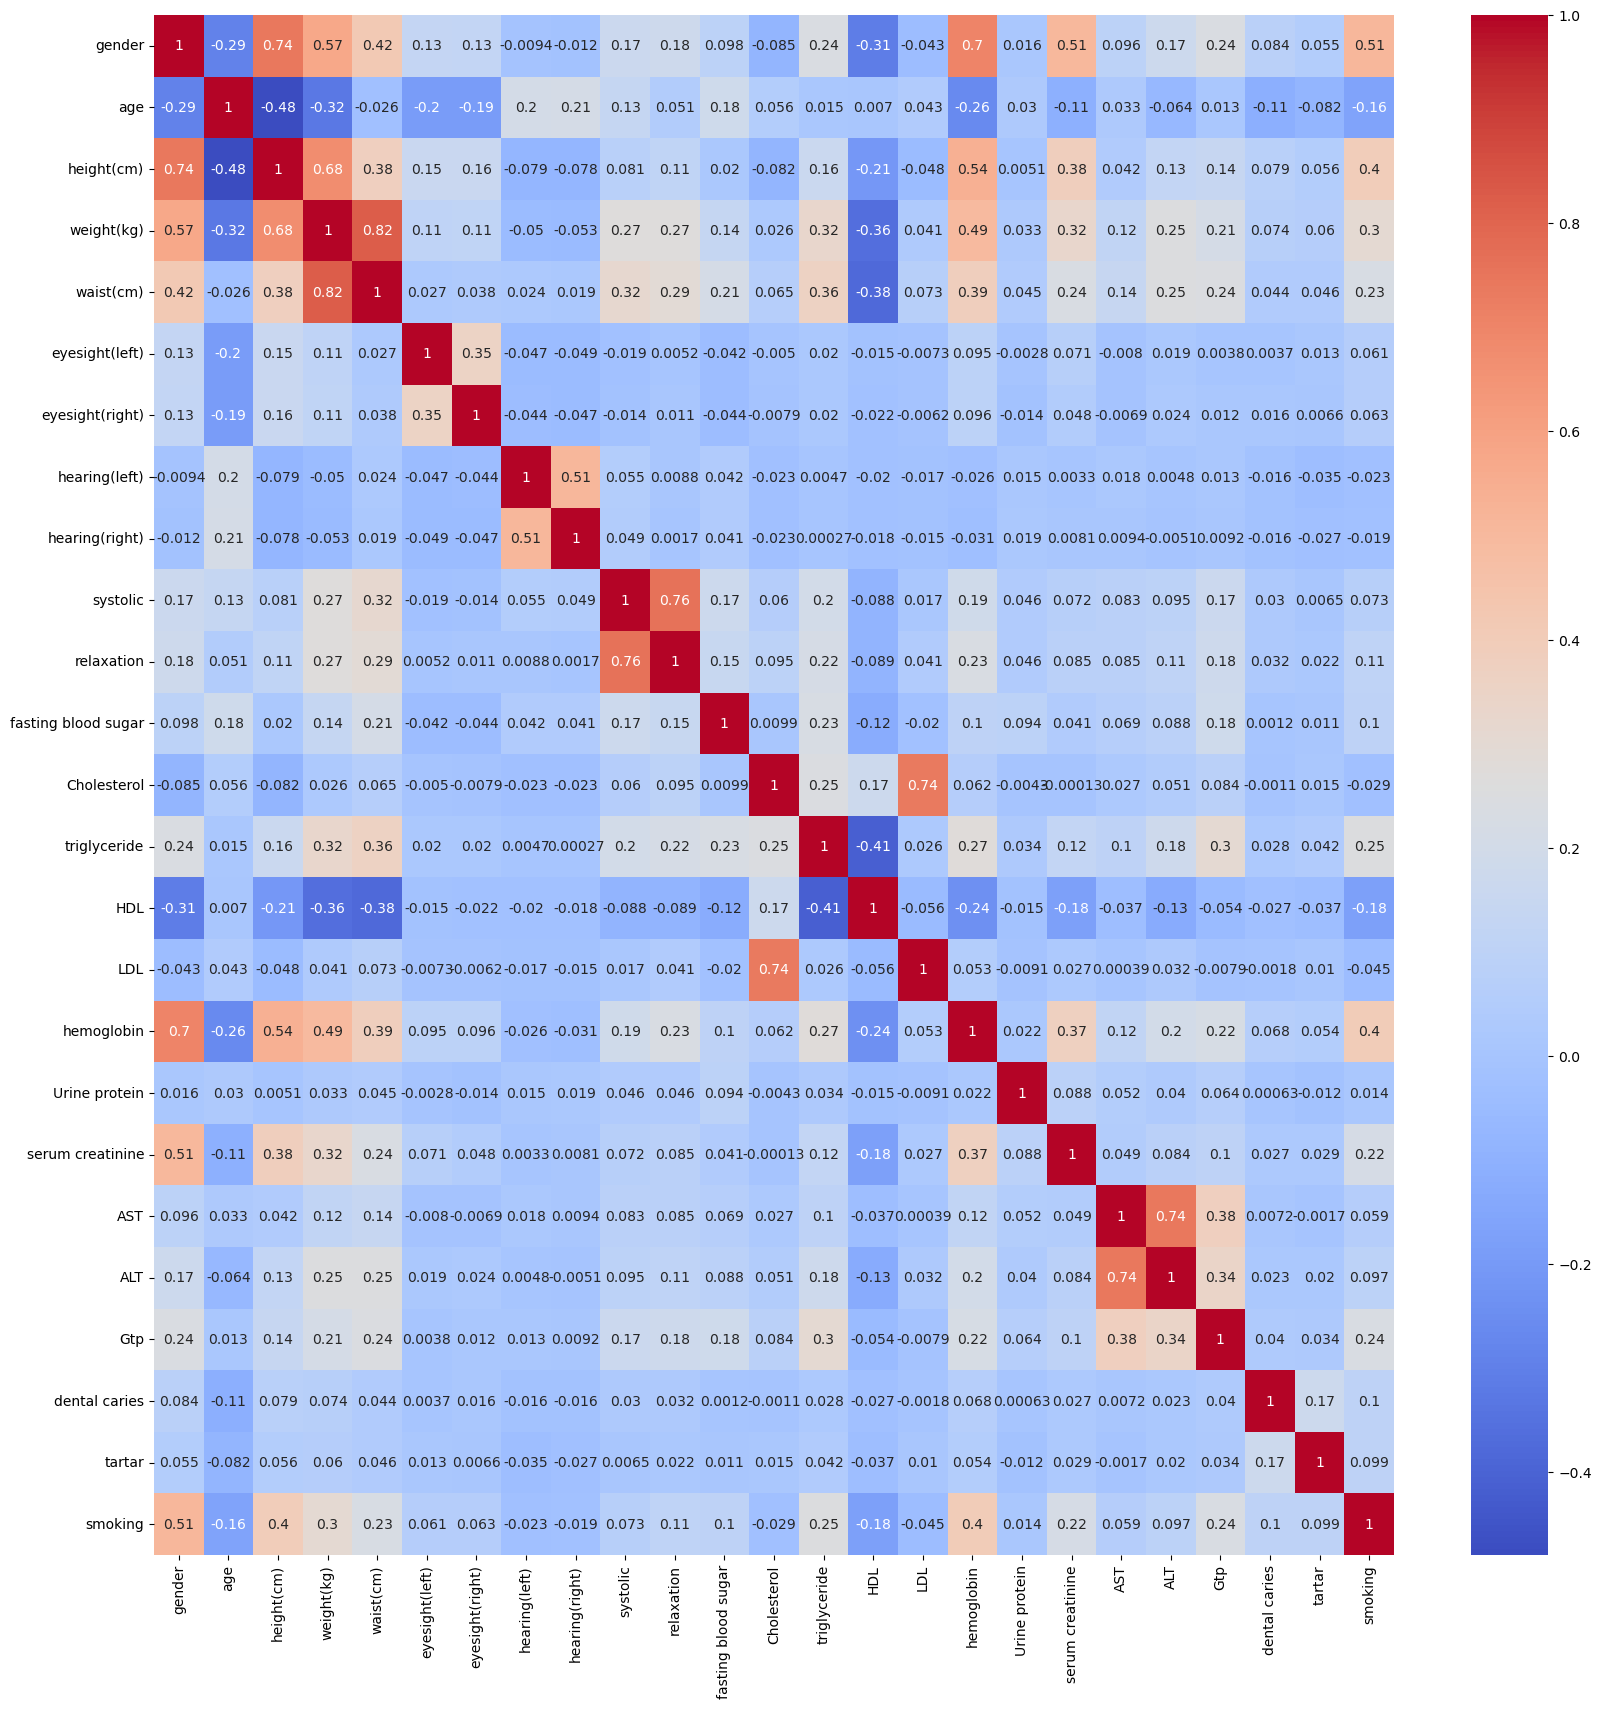

In [20]:
# Visualising correlations between multiple variables
import matplotlib.pyplot as plt
import seaborn as sns                  
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.show()

In [21]:
# splitting the data into independent and dependent
X=df.drop(["smoking"], axis=1)
y=df["smoking"]

* **Feature Selection with RFECV**

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import train_test_split

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Increase the number of iterations for Logistic Regression
log_reg = LogisticRegression(max_iter=100)

# Recursive Feature Elimination with Cross-Validation
rfe_model = RFECV(log_reg, cv=3)
rfe_model.fit(X_train_scaled, y_train)

RFECV(cv=3, estimator=LogisticRegression())

In [23]:
[rfe_model.get_support()]

[array([ True, False,  True,  True,  True,  True, False,  True, False,
         True,  True,  True,  True,  True,  True,  True,  True, False,
         True,  True,  True,  True,  True,  True])]

In [24]:
# Print the Optimal number of features
rfe_model.n_features_

20

In [25]:
rfe_model.get_support()

array([ True, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True])

In [26]:
# Print the Selected features from all thee existing columns
features_selected = X.columns[rfe_model.get_support()]
features_selected

Index(['gender', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'hearing(left)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar'],
      dtype='object')

In [27]:
X = X[features_selected]
X.columns

Index(['gender', 'height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)',
       'hearing(left)', 'systolic', 'relaxation', 'fasting blood sugar',
       'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin',
       'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries', 'tartar'],
      dtype='object')

In [28]:
y

0        0
1        0
2        1
3        0
4        0
        ..
55687    0
55688    0
55689    0
55690    0
55691    1
Name: smoking, Length: 55692, dtype: int64

* **Now build the logistic regression model**

In [29]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# # Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# # Increase the number of iterations for Logistic Regression
log_reg = LogisticRegression(max_iter=100)

# Training the model
log_reg.fit(X_train_scaled, y_train)

# Testing the model
y_pred = log_reg.predict(X_test_scaled)

In [30]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7470074215944458
Classification report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80     10531
           1       0.65      0.69      0.67      6177

    accuracy                           0.75     16708
   macro avg       0.73      0.74      0.73     16708
weighted avg       0.75      0.75      0.75     16708



In [31]:
cm=confusion_matrix(y_test,y_pred)
cm

NameError: name 'confusion_matrix' is not defined

In [ ]:
sns.heatmap(cm,annot=True,cmap="Greens",fmt="d")